In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -q keras

In [0]:
!pip install -q pandas

In [0]:
from keras import optimizers, losses
from keras.layers import *
from keras.models import Model
from keras.backend import int_shape
from keras.utils import to_categorical
from keras.preprocessing import image
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = 'drive/My Drive/project/faces/'

In [0]:
features = []
filenames = os.listdir(DATA_PATH)
for filename in filenames:
  img = image.load_img(DATA_PATH + filename, target_size=(192, 192))
  x = image.img_to_array(img)
  features.append(x)

In [91]:
features = np.asarray(features, dtype=np.float32)
features.shape

(380, 192, 192, 3)

In [0]:
features /= 255

In [0]:
X_train = features.reshape([-1, 192, 192, 3])

In [98]:
X_train.shape
y_train = np.ones([380, 1])
y_train.shape

(380, 1)

In [95]:
input = Input(shape = (192, 192, 3))
conv1 = Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', kernel_initializer='he_normal')(input)
pool1 = MaxPooling2D((2, 2), strides=2)(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(pool1)
norm1 = BatchNormalization()(conv2)
conv3 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(norm1)
norm2 = BatchNormalization()(conv3)
pool2 = MaxPooling2D((2, 2), strides=2)(norm2)
conv4 = Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(pool2)
conv5 = Conv2D(192, kernel_size=(3, 3), activation='relu', padding='same')(conv4)
norm3 = BatchNormalization()(conv5)
pool3 = MaxPooling2D((2, 2), strides=2)(norm3)
flat = Flatten()(pool3)
dense1 = Dense(2048, activation='relu')(flat)
dense2 = Dense(1024, activation='relu')(dense1)
output = Dense(1, activation='sigmoid')(dense2)

model = Model(inputs=input, outputs=output)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 192, 192, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 192, 192, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 96, 96, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 96, 96, 64)        256       
__________

In [0]:
model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.Adam())

In [99]:
# Training the model on images of faces.
epochs = 10
batch_size = 32

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
380/380 [==============================] - 14s 36ms/step - loss: 0.1782
Epoch 2/10
380/380 [==============================] - 6s 15ms/step - loss: 1.1921e-07
Epoch 3/10
380/380 [==============================] - 6s 15ms/step - loss: 1.1921e-07
Epoch 4/10
380/380 [==============================] - 6s 15ms/step - loss: 1.1921e-07
Epoch 5/10
380/380 [==============================] - 6s 15ms/step - loss: 1.1921e-07
Epoch 6/10
380/380 [==============================] - 6s 15ms/step - loss: 1.1921e-07
Epoch 7/10
380/380 [==============================] - 6s 15ms/step - loss: 1.1921e-07
Epoch 8/10
380/380 [==============================] - 6s 15ms/step - loss: 1.1921e-07
Epoch 9/10
380/380 [==============================] - 6s 15ms/step - loss: 1.1921e-07
Epoch 10/10
380/380 [==============================] - 6s 15ms/step - loss: 1.1921e-07


In [0]:
out = model.get_layer(index=11).output
out = UpSampling2D()(out)
out = UpSampling2D()(out)
out = UpSampling2D()(out)
out = Activation('sigmoid')(out)

In [0]:
model2 = Model(inputs=model.get_layer(index=0).input, outputs=out)
model2.compile(loss=losses.binary_crossentropy, optimizer=optimizers.Adam())

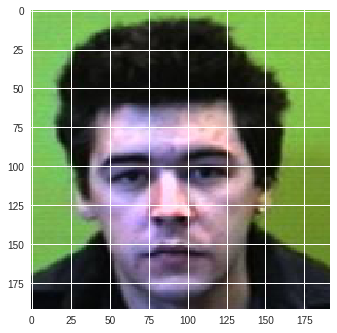

In [116]:
sample = X_train[15]
plt.imshow(sample)
sample = sample.reshape([1, 192, 192, 3])

In [0]:
out_img = model2.predict(sample)
out_img = np.asarray(out_img*255, dtype=np.int32)
out_img = np.rollaxis(out_img, 3, 1)

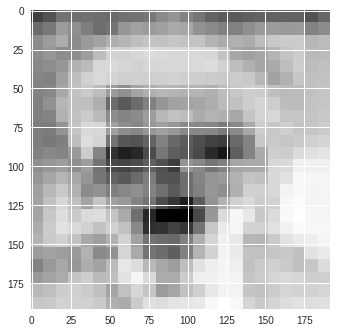

In [115]:
disp = out_img[0]
image = np.zeros([192, 192])
for i in range(192):
  image += disp[i]
plt.imshow(image)
# The below figure clearly shows the activation regions (two eyes, a nose and a mouth) in the above facial image that helps in identifying a face

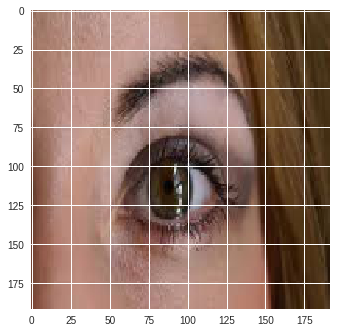

In [149]:
img = image.load_img('drive/My Drive/project/download (1).jpg', target_size=(192, 192))
sample = image.img_to_array(img)
sample = np.asarray(sample, dtype=np.uint8)
plt.imshow(sample)
sample = sample.reshape([1, 192, 192, 3])

# Taking an image of an eye and passing it through previous face detection model.

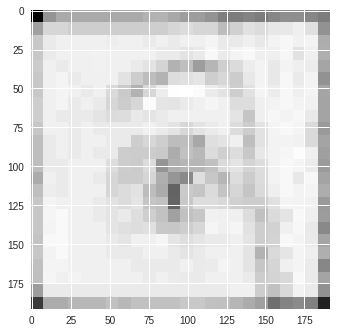

In [143]:
out_img = model2.predict(sample)
out_img = np.asarray(out_img*255, dtype=np.int32)
out_img = np.rollaxis(out_img, 3, 1)

disp = out_img[0]
image = np.zeros([192, 192])
for i in range(192):
  image += disp[i]
plt.imshow(image)

# It is clear from figure below that the regions of the eye have been activated in the above image more than its surroundings.
# Thus, this model can be used to exclusively detect eyes in an image without changing its architecture or retraining the model (excepting for adding a new output layer).